<a href="https://colab.research.google.com/github/priyankav-27/CVIP_Datascience_phase1task/blob/main/custbehaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
from google.colab import drive
drive.mount('/content/drive')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
transaction_data = pd.read_csv('/content/drive/My Drive/archive (1)/Hackathon_Working_Data.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
# Print the first few rows of the dataset
print(transaction_data.head())

  MONTH STORECODE  DAY BILL_ID  BILL_AMT  QTY  VALUE  PRICE  \
0    M1        N1    4    T375     225.0  1.0  225.0  225.0   
1    M1        N1    4    T379      95.0  1.0   95.0   95.0   
2    M1        N1    4    T381      10.0  1.0   10.0   10.0   
3    M1        N1    4    T382     108.0  1.0  108.0  108.0   
4    M1        N1    4    T384      19.0  1.0   19.0   19.0   

                       GRP                     SGRP                    SSGRP  \
0     BUTTER MARGR  (4/94)                   BUTTER                   SALTED   
1  CONFECTIONERY - ECLAIRS  CONFECTIONERY - ECLAIRS  CONFECTIONERY - ECLAIRS   
2                CHOCOLATE         CHOCOLATE PANNED         CHOCOLATE PANNED   
3             PACKAGED TEA               MAIN PACKS               MAIN PACKS   
4         ALL IODISED SALT            POWDERED SALT            POWDERED SALT   

                      CMP           MBRD                 BRD  
0               G C M M F           AMUL                AMUL  
1             

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
# Data Cleaning and Preprocessing
# Assuming 'transaction_data' has columns like 'CustomerID', 'ProductID', 'Quantity', 'UnitPrice', etc.
# Remove missing values and negative quantities
transaction_data = transaction_data.dropna()
transaction_data = transaction_data[transaction_data['QTY'] > 0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
# Descriptive Statistics
# Summary statistics
summary_stats = transaction_data.describe()
print(summary_stats)

                DAY      BILL_AMT           QTY         VALUE         PRICE
count  26985.000000  26985.000000  26985.000000  26985.000000  26985.000000
mean      15.167019    278.754206      4.105021     67.808551     52.812982
std        8.956057    541.398504     95.666947    118.005978     84.987730
min        1.000000      0.000000      0.500000      0.000000      0.000000
25%        7.000000     40.000000      1.000000     10.000000     10.000000
50%       14.000000    111.000000      1.000000     30.000000     22.000000
75%       23.000000    280.000000      2.000000     80.000000     64.000000
max       31.000000   7292.000000  12000.000000   3150.000000   3150.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


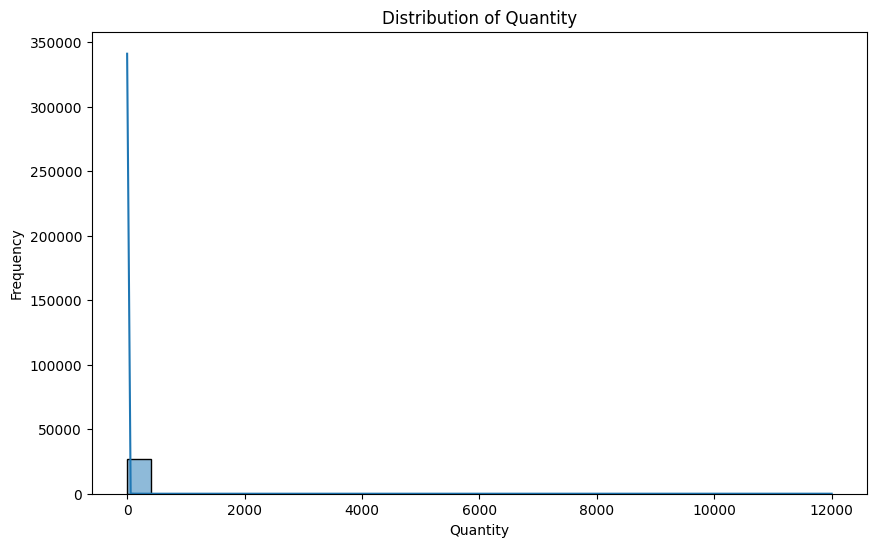

In [40]:
# Visualizations
# Histogram of Quantity
plt.figure(figsize=(10, 6))
sns.histplot(transaction_data['QTY'], bins=30, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


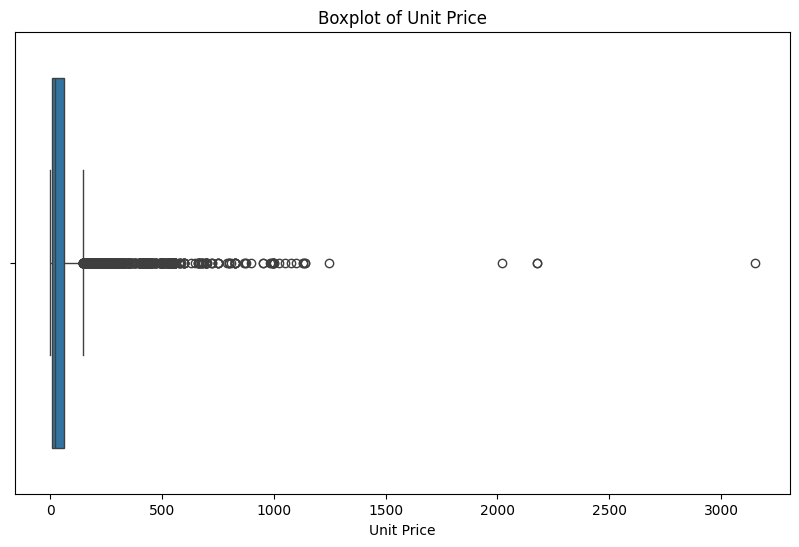

In [41]:
# Boxplot of UnitPrice
plt.figure(figsize=(10, 6))
sns.boxplot(x='PRICE', data=transaction_data)
plt.title('Boxplot of Unit Price')
plt.xlabel('Unit Price')
plt.show()

In [42]:
# Customer Segmentation using k-means clustering
# Select relevant features for clustering
X = transaction_data[['QTY', 'PRICE']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
# Choose the number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [44]:
# Add cluster labels to the dataset
transaction_data['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


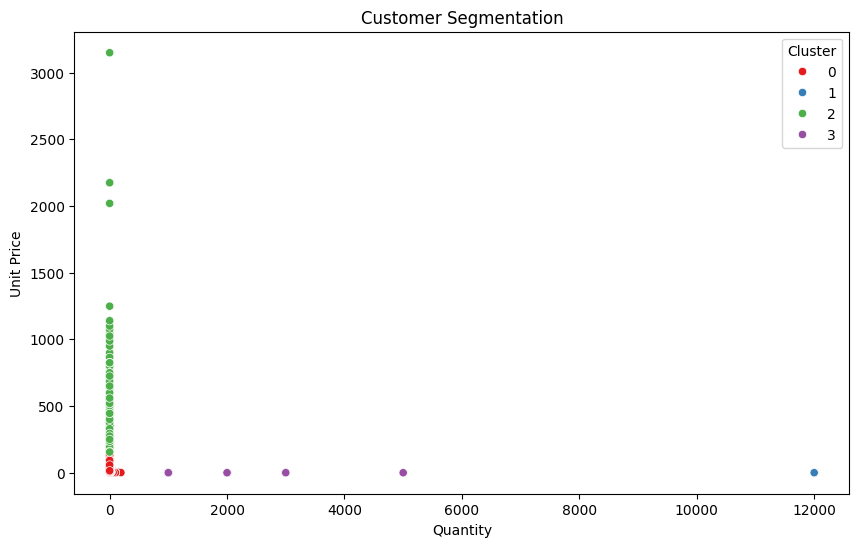

In [45]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='QTY', y='PRICE', hue='Cluster', data=transaction_data, palette='Set1')
plt.title('Customer Segmentation')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()

In [46]:
# Association Analysis using Apriori algorithm
# Convert transaction data to a one-hot encoded DataFrame
basket = transaction_data.groupby(['BILL_ID', 'GRP'])['QTY'].sum().unstack().fillna(0)
basket[basket > 1] = 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
# Convert quantity values to binary (0 or 1)
basket[basket > 0] = 1

# Find frequent itemsets using Apriori
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [49]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
# Filter rules with high lift
high_lift_rules = rules[(rules['lift'] >= 1) & (rules['confidence'] >= 0.5)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
# Display association rules
print(high_lift_rules.head())

                        antecedents                   consequents  \
3              (CLEANERS - UTENSIL)  (BISCUITS - CORE & NON CORE)   
4                    (PACKAGED TEA)  (BISCUITS - CORE & NON CORE)   
6   (REFINED EDIBLE OILS-ALL PACKS)  (BISCUITS - CORE & NON CORE)   
9             (SALTY SNACKS (2/97))  (BISCUITS - CORE & NON CORE)   
10           (TOILET SOAPS (04/00))  (BISCUITS - CORE & NON CORE)   

    antecedent support  consequent support   support  confidence      lift  \
3             0.090753            0.474626  0.056351    0.620926  1.308242   
4             0.132783            0.474626  0.074408    0.560375  1.180666   
6             0.123599            0.474626  0.063045    0.510076  1.074689   
9             0.201432            0.474626  0.101339    0.503091  1.059973   
10            0.118306            0.474626  0.069427    0.586842  1.236430   

    leverage  conviction  zhangs_metric  
3   0.013277    1.385940       0.259133  
4   0.011386    1.195050       0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
